<a href="https://colab.research.google.com/github/AMIT110409/Deep_learning_Algo_implementation/blob/main/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('user_dataset.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,7423388,Male,34,61214,0
1,7550634,Female,19,85271,0
2,5304572,Male,19,59064,1
3,3234489,Male,45,85091,1
4,8204212,Male,40,55818,0


In [5]:
df = df.drop(["User ID","Gender"], axis=1)

In [6]:
df.head()


,Age,EstimatedSalary,Purchased
0,34,61214,0
1,19,85271,0
2,19,59064,1
3,45,85091,1
4,40,55818,0


In [7]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

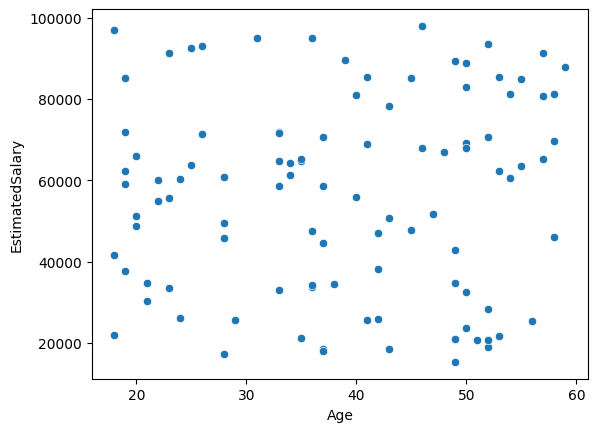

In [9]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
import tensorflow as tf
from tensorflow import keras
from  keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.5617 - loss: 3946.7893 - val_accuracy: 0.5500 - val_loss: 3188.0464
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5539 - loss: 2988.8872 - val_accuracy: 0.5500 - val_loss: 2168.8022
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5422 - loss: 2002.2205 - val_accuracy: 0.5500 - val_loss: 1151.2573
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5109 - loss: 1158.0454 - val_accuracy: 0.5500 - val_loss: 143.5153
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3930 - loss: 243.7569 - val_accuracy: 0.4500 - val_loss: 635.7443
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4500 - loss: 685.3060 - val_accuracy: 0.4500 - val_loss: 789.3534
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4227 - loss: 805.9653 - val_accuracy: 0.4500 - val_loss: 573.5946
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4891 - loss: 434.1

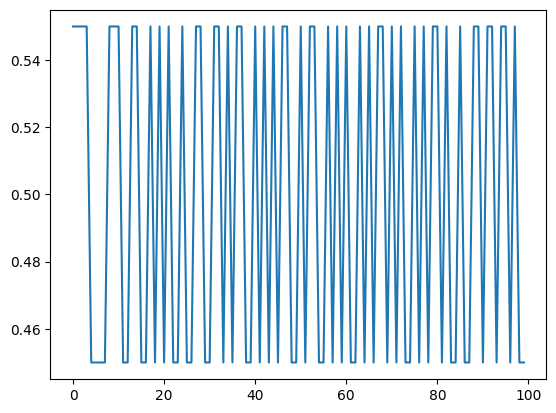

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [20]:
# if we have unnormalized  feature then we get more oscillation in training  so it create problem
## while if we have normalized feature then it help us  and in training it is smooth and go propely.

In [25]:
## feature scale
## applying the scaling .

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-1.43724836, -0.2223793 ],
       [-1.35644733, -0.91048212],
       [ 0.25957332,  1.20211133],
       [ 0.66357848,  1.73145011],
       [-0.7908401 , -0.45068876],
       [ 1.06758364, -1.50101252],
       [-0.14443185, -0.93337155],
       [-1.2756463 ,  0.14539691],
       [ 0.98678261,  0.53063258],
       [-0.14443185,  1.60280153],
       [ 0.90598158, -1.72234655],
       [-1.19484527, -0.95847473],
       [-0.7908401 , -1.63600999],
       [-1.11404423,  0.15454433],
       [-1.0332432 ,  1.50531264],
       [-0.14443185, -0.95337891],
       [ 1.63319087, -0.43907697],
       [-0.22523288,  0.36606264],
       [-1.5180494 ,  0.10559104],
       [ 0.58277745, -0.36719249],
       [-0.06363081, -1.59206898],
       [ 0.90598158, -0.57578697],
       [ 1.14838467, -1.17508886],
       [ 1.55238983,  0.36756632],
       [-1.35644733, -1.09426581],
       [-1.19484527, -0.03224673],
       [-1.11404423, -1.27157529],
       [-0.06363081, -0.49889021],
       [-0.95244217,

In [29]:
model = Sequential()

<Axes: >

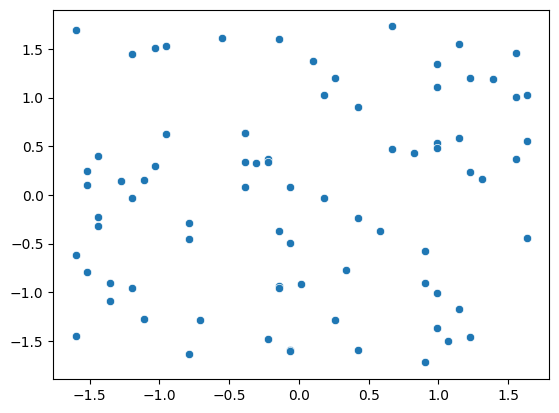

In [31]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [32]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.4516 - loss: 0.7096 - val_accuracy: 0.4000 - val_loss: 0.7208
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4938 - loss: 0.7045 - val_accuracy: 0.4000 - val_loss: 0.7129
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4812 - loss: 0.6991 - val_accuracy: 0.4500 - val_loss: 0.7052
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4977 - loss: 0.6979 - val_accuracy: 0.5000 - val_loss: 0.6986
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5180 - loss: 0.6956 - val_accuracy: 0.5500 - val_loss: 0.6929
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5453 - loss: 0.6872 - val_accuracy: 0.5000 - val_loss: 0.6892
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5391 - loss: 0.6878 - val_accuracy: 0.5000 - val_loss: 0.6856
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5641 - loss: 0.6866 - val_accuracy: 0.4500 - val_loss: 0.6820
Epo

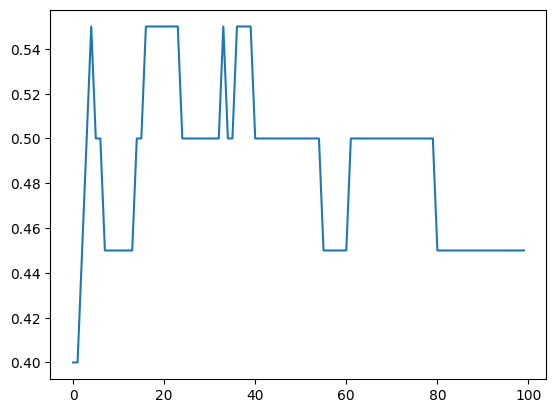

In [33]:
plt.plot(history.history['val_accuracy'])